# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="



## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)




633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
# PERFORM API CALLS

# set blank lists to append APT data to
c_name = []
c_lat = []
c_lng = []
c_temp = []
c_hum = []
c_clouds = []
c_wind = []
c_country = []
c_date = []

# set initial counts
count = 0
index_count = 1

# print header
print("Beginning Data Retrevial")
print("------------------------")
print(" ")

# loop through cities and pull data from API
for city in cities:
    
    # try for cities found
    try:
        
        # retrieve data from API
        response = requests.get(query_url + city).json()
        
        # add data to lists
        c_lat.append(response["coord"]["lat"])
        c_lng.append(response["coord"]["lon"])
        c_temp.append(response["main"]["temp_max"])
        c_hum.append(response["main"]["humidity"])
        c_clouds.append(response["clouds"]["all"])
        c_wind.append(response["wind"]["speed"])
        c_country.append(response["sys"]["country"])
        c_date.append(response["dt"])
        c_name.append(city)
        
        # count records and sets
        if count > 49:
            count = 0
            index_count += 1
        else:
            count += 1
        
        # print current record
        print(f"{city} is record number {count} of Set {index_count}")
    
    # except prevents error if city isn't found    
    except:
        
        # let user know when record isn't found
        print(f"    City not found.  Skipping...")

# print footer
print(" ")
print("------------------------")       
print("Data Retrevial Complete")
print("------------------------")     

Beginning Data Retrevial
------------------------
 
    City not found.  Skipping...
busselton is record number 1 of Set 1
severo-kurilsk is record number 2 of Set 1
meulaboh is record number 3 of Set 1
kodiak is record number 4 of Set 1
punta arenas is record number 5 of Set 1
tuktoyaktuk is record number 6 of Set 1
tiksi is record number 7 of Set 1
lavrentiya is record number 8 of Set 1
grand gaube is record number 9 of Set 1
rikitea is record number 10 of Set 1
axim is record number 11 of Set 1
yellowknife is record number 12 of Set 1
roxana is record number 13 of Set 1
souillac is record number 14 of Set 1
chokurdakh is record number 15 of Set 1
grindavik is record number 16 of Set 1
bambous virieux is record number 17 of Set 1
palmeira das missoes is record number 18 of Set 1
ulaanbaatar is record number 19 of Set 1
maniitsoq is record number 20 of Set 1
burnie is record number 21 of Set 1
    City not found.  Skipping...
seoul is record number 22 of Set 1
jamestown is record numb

assiniboia is record number 47 of Set 4
shimanovsk is record number 48 of Set 4
tomatlan is record number 49 of Set 4
iqaluit is record number 50 of Set 4
ternate is record number 0 of Set 5
manyana is record number 1 of Set 5
nawabganj is record number 2 of Set 5
kirakira is record number 3 of Set 5
ust-maya is record number 4 of Set 5
tame is record number 5 of Set 5
lata is record number 6 of Set 5
sao joao da barra is record number 7 of Set 5
rolla is record number 8 of Set 5
slave lake is record number 9 of Set 5
najran is record number 10 of Set 5
suvorovo is record number 11 of Set 5
    City not found.  Skipping...
kahului is record number 12 of Set 5
kwinana is record number 13 of Set 5
vardo is record number 14 of Set 5
porkhov is record number 15 of Set 5
luderitz is record number 16 of Set 5
mudgee is record number 17 of Set 5
mehamn is record number 18 of Set 5
fortuna is record number 19 of Set 5
bad aussee is record number 20 of Set 5
umm kaddadah is record number 21 of 

saint anthony is record number 1 of Set 9
todos santos is record number 2 of Set 9
tigil is record number 3 of Set 9
virginia beach is record number 4 of Set 9
naze is record number 5 of Set 9
hilton head island is record number 6 of Set 9
khandyga is record number 7 of Set 9
amol is record number 8 of Set 9
igrim is record number 9 of Set 9
lasem is record number 10 of Set 9
basco is record number 11 of Set 9
machinga is record number 12 of Set 9
basse is record number 13 of Set 9
krutikha is record number 14 of Set 9
    City not found.  Skipping...
airai is record number 15 of Set 9
high level is record number 16 of Set 9
venado tuerto is record number 17 of Set 9
    City not found.  Skipping...
emba is record number 18 of Set 9
peniche is record number 19 of Set 9
oranjemund is record number 20 of Set 9
mountrath is record number 21 of Set 9
vestmannaeyjar is record number 22 of Set 9
linares is record number 23 of Set 9
shenkursk is record number 24 of Set 9
san quintin is record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
# create dataframe from raw data
city_df=pd.DataFrame({"City": c_name,
                   "Lat":c_lat,
                   "Lng":c_lng,
                   "Max Temp":c_temp,
                   "Humidity":c_hum,
                   "Cloudiness":c_clouds,
                   "Wind Speed":c_wind,
                   "Country":c_country,
                   "Date":c_date
                  })

# format latest date to a displayable format for graphs
date_max = max(c_date)
new_date = datetime.fromtimestamp(date_max)
proper_date = new_date.strftime("%m/%d/%Y")

# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
city_df.to_csv(output_data_file, encoding="utf-8", index=False)

# display dataframe
city_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.33,11.11,68,0,4.45,AU,1602875405
1,severo-kurilsk,50.68,156.12,5.29,72,75,7.81,RU,1602875299
2,meulaboh,4.14,96.13,24.95,85,100,1.71,ID,1602875405
3,kodiak,57.79,-152.41,2.00,74,1,2.24,US,1602875405
4,punta arenas,-53.15,-70.92,5.00,86,90,5.10,CL,1602875405


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [65]:
#  Get the indices of cities that have humidity over 100%.
    
too_humid = [i for i in city_df["Humidity"] if i >90]

len(too_humid)

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_df=city_df[city_df["Humidity"] <=90]
                
clean_df.describe()

# -------****** 90 used for testing... switch to 100


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,4.700000e+02
mean,18.483106,11.054489,18.171553,63.714894,43.659574,3.730468,1.602875e+09
std,31.677935,89.389791,10.577763,21.617029,40.923704,2.476261,2.070870e+02
min,-54.800000,-159.780000,-10.000000,10.000000,0.000000,0.200000,1.602875e+09
25%,-7.817500,-70.225000,10.000000,49.000000,0.000000,1.810000,1.602875e+09
50%,22.625000,17.300000,20.000000,71.000000,39.000000,3.120000,1.602875e+09
75%,43.765000,80.567500,26.227500,81.000000,90.000000,5.140000,1.602875e+09
max,78.220000,177.920000,38.480000,90.000000,100.000000,15.900000,1.602875e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

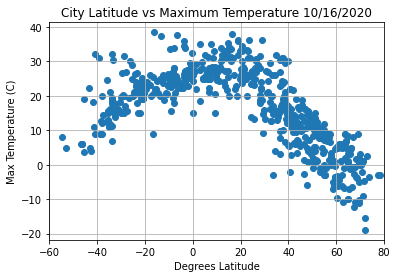

In [83]:
# set up the dataframe to plot
latVStemp = city_clean[["Lat","Max Temp"]]

# plot graph
x_values = latVStemp.iloc[:,0]
y_values = latVStemp.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs Maximum Temperature {proper_date}")
plt.xlim(-60, 80)
plt.grid()
plt.savefig('output_data/Lat_vs_Temp')
plt.show()


## Latitude vs. Humidity Plot

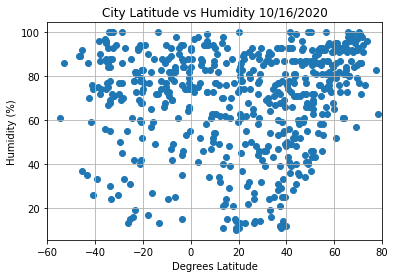

In [84]:
# set up the dataframe to plot
latVShum = city_clean[["Lat","Humidity"]]

# plot graph
x_values = latVShum.iloc[:,0]
y_values = latVShum.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity {proper_date}")
plt.xlim(-60, 80)
plt.grid()
plt.savefig('output_data/Lat_vs_Hum')
plt.show()



## Latitude vs. Cloudiness Plot

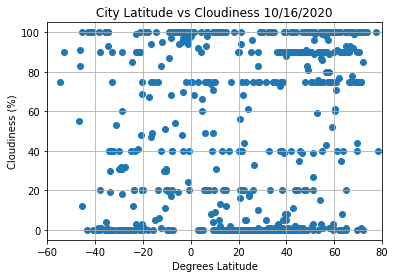

In [94]:
# set up the dataframe to plot
latVScloud = city_clean[["Lat","Cloudiness"]]

# plot graph
x_values = latVScloud.iloc[:,0]
y_values = latVScloud.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness {proper_date}")
plt.xlim(-60, 80)
plt.grid()
plt.savefig('output_data/Lat_vs_Cloud')
plt.show()


## Latitude vs. Wind Speed Plot

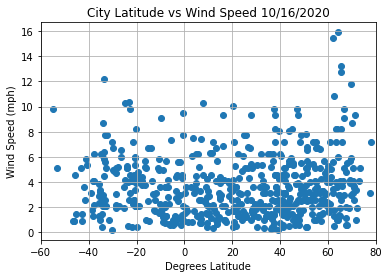

In [85]:
# set up the dataframe to plot
latVSwind = city_clean[["Lat","Wind Speed"]]

# plot graph
x_values = latVSwind.iloc[:,0]
y_values = latVSwind.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed {proper_date}")
plt.xlim(-60, 80)
plt.grid()
plt.savefig('output_data/Lat_vs_Wind')
plt.show()


## Linear Regression

In [68]:
# seperate the Northern and Southern Hemispheres

north_cities = city_clean[city_clean["Lat"]>=0]
south_cities = city_clean[city_clean["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

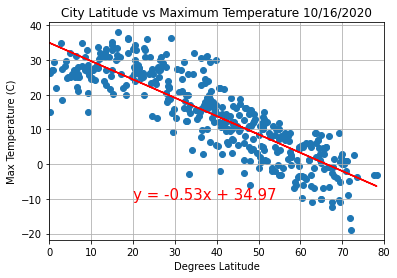

The r-value is -0.86


In [86]:
# set up the dataframe to plot
latVStemp = north_cities[["Lat","Max Temp"]]

# plot graph
x_values = latVStemp.iloc[:,0]
y_values = latVStemp.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs Maximum Temperature {proper_date}")
plt.xlim(0, 80)
plt.grid()

# calculate regression and draw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.savefig('output_data/NH_Temp_Lat')
plt.show()

# print r value
print(f'The r-value is {round(rvalue,2)}')



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

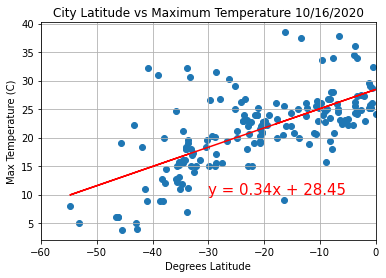

The r-value is 0.66


In [87]:
# set up the dataframe to plot
latVStemp = south_cities[["Lat","Max Temp"]]

# plot graph
x_values = latVStemp.iloc[:,0]
y_values = latVStemp.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs Maximum Temperature {proper_date}")
plt.xlim(-60, 0)
plt.grid()

# calculate regression and draw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.savefig('output_data/SH_Temp_Lat')
plt.show()

# print r value
print(f'The r-value is {round(rvalue,2)}')

Temperature Analysis:  There is a strong correlation in both hemispheres between temperature and proximity to the equator.  The correlation is technically negative in the North and positive in the South due to the numbering of lines latitude running from negative to positive.  The correlation is stronger in the North; this could have to do with it's much larger land area, geographic diversity and population (resulting in more diverse cities generated by random coordinates.)  I would be interested to see what this data looked like if elevation was controlled for.  I would also be interested to see any random coordiantes located on a body of water dropped rather than looking for the nearest city, this would remove the bias (especially in the Southern Hemisphere) of overmeasuring coastal cities.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

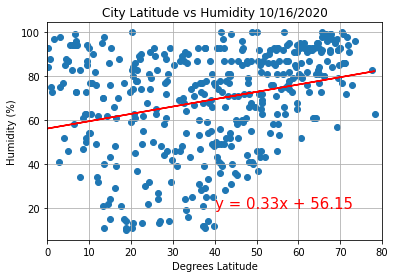

The r-value is 0.28


In [88]:
# set up the dataframe to plot
latVShum = north_cities[["Lat","Humidity"]]

# plot graph
x_values = latVShum.iloc[:,0]
y_values = latVShum.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity {proper_date}")
plt.xlim(0, 80)
plt.grid()

# calculate regression and draw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.savefig('output_data/NH_Hum_Lat')
plt.show()

# print r value
print(f'The r-value is {round(rvalue,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

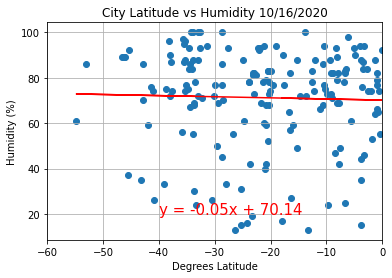

The r-value is -0.0303


In [89]:
# set up the dataframe to plot
latVShum = south_cities[["Lat","Humidity"]]

# plot graph
x_values = latVShum.iloc[:,0]
y_values = latVShum.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity {proper_date}")
plt.xlim(-60, 0)
plt.grid()

# calculate regression and draw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.savefig('output_data/SH_Hum_Lat')
plt.show()

# print r value
print(f'The r-value is {round(rvalue,4)}')

Humidity Analysis:  The correlation numbers are very low in both hemispheres.  It is slightly higher in the North because there doesn't appear to be many low humidity cities with high latitudes.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

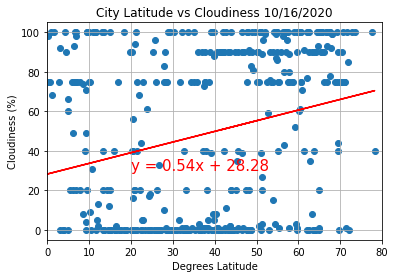

The r-value is 0.2571


In [90]:
# set up the dataframe to plot
latVScloud = north_cities[["Lat","Cloudiness"]]

# plot graph
x_values = latVScloud.iloc[:,0]
y_values = latVScloud.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness {proper_date}")
plt.xlim(0, 80)
plt.grid()

# calculate regression and draw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.savefig('output_data/NH_Cloud_Lat')
plt.show()

# print r value
print(f'The r-value is {round(rvalue,4)}')



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

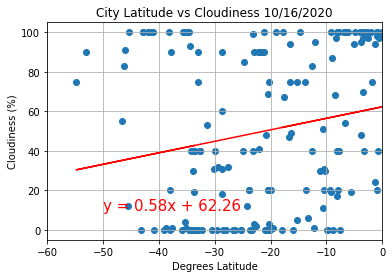

The r-value is 0.1903


In [91]:
# set up the dataframe to plot
latVScloud = south_cities[["Lat","Cloudiness"]]

# plot graph
x_values = latVScloud.iloc[:,0]
y_values = latVScloud.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness {proper_date}")
plt.xlim(-60, 0)
plt.grid()

# calculate regression and draw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.savefig('output_data/SH_Cloud_Lat')
plt.show()

# print r value
print(f'The r-value is {round(rvalue,4)}')


Cloudiness Analysis:  These correlation numbers are low.  The most interesting thing is that both are positively correlated even though the lattitude numbers are positive in the North and negative in the South; meaning in the North, the most clouds are far from the equator and in the South, the most clouds are near to the equator.  This most likely has to do with the very different geogrpahies and percentages of land mass in the two hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

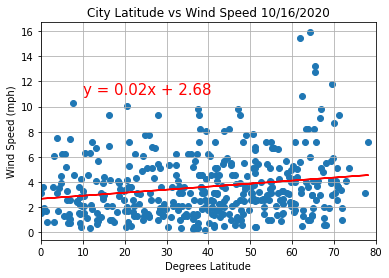

The r-value is 0.1905


In [92]:
# set up the dataframe to plot
latVSwind = north_cities[["Lat","Wind Speed"]]

# plot graph
x_values = latVSwind.iloc[:,0]
y_values = latVSwind.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed {proper_date}")
plt.xlim(0, 80)
plt.grid()

# calculate regression and draw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,11),fontsize=15,color="red")
plt.savefig('output_data/NH_Wind_Lat')
plt.show()

# print r value
print(f'The r-value is {round(rvalue,4)}')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

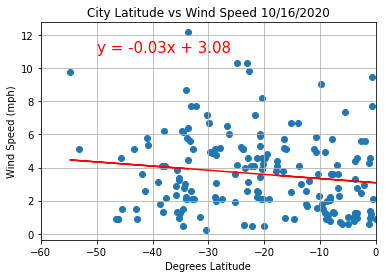

The r-value is -0.1413


In [93]:
# set up the dataframe to plot
latVSwind = south_cities[["Lat","Wind Speed"]]

# plot graph
x_values = latVSwind.iloc[:,0]
y_values = latVSwind.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Degrees Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed {proper_date}")
plt.xlim(-60,0)
plt.grid()

# calculate regression and draw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,11),fontsize=15,color="red")
plt.savefig('output_data/SH_Wind_Lat')
plt.show()

# print r value
print(f'The r-value is {round(rvalue,4)}')


Wind Analysis:  The correlations are low.  One interesting thing is that the outliers in the North mostly occur more than 60 degrees from the equator and the South doesn't really have cities that far from the equator.  The South has a greater spread in the data, probably because of the lower percentage of land in the South.
